# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"

<font size="4">Author Reginold K Binoy</font>

## INTERMEDIATE LEVEL TASK

### Task 6 -Prediction using Decision Tree Algorithm

create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset : https://bit.ly/3kXTdox

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Importing Dataset

In [6]:
data=pd.read_csv("Iris.csv")

# Cutting short the usual procedures becuase it's done in 1st task

# Data Visualisation

/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


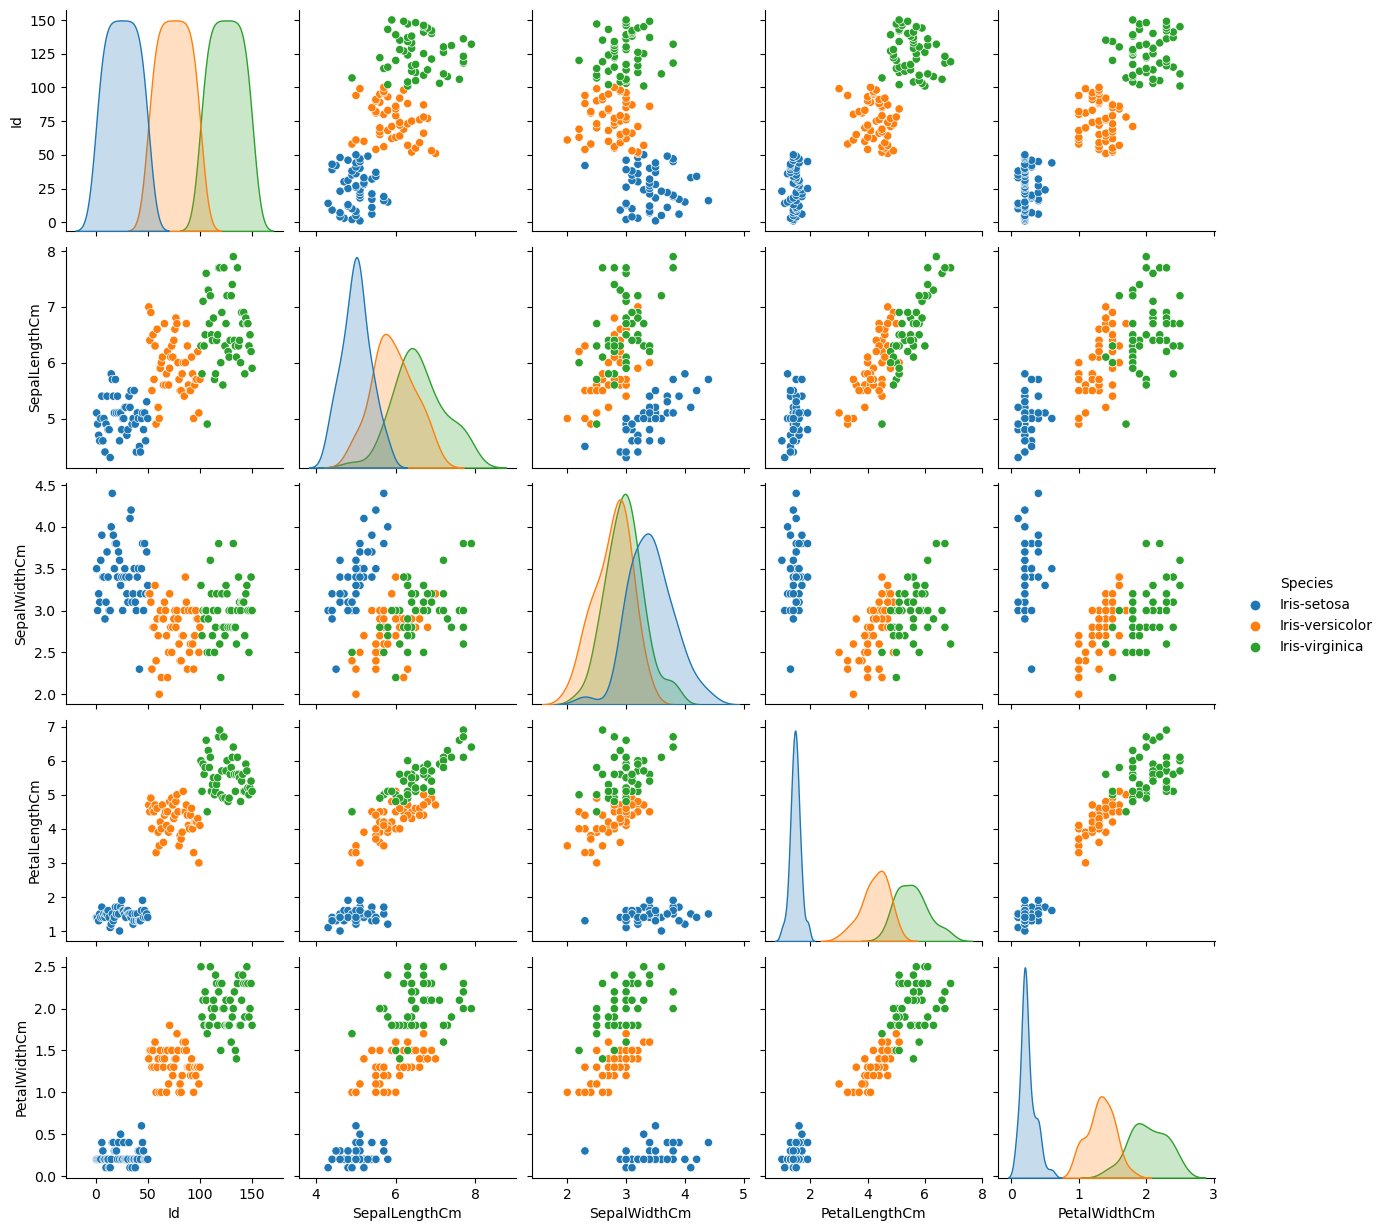

In [8]:
sns.pairplot(data,hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

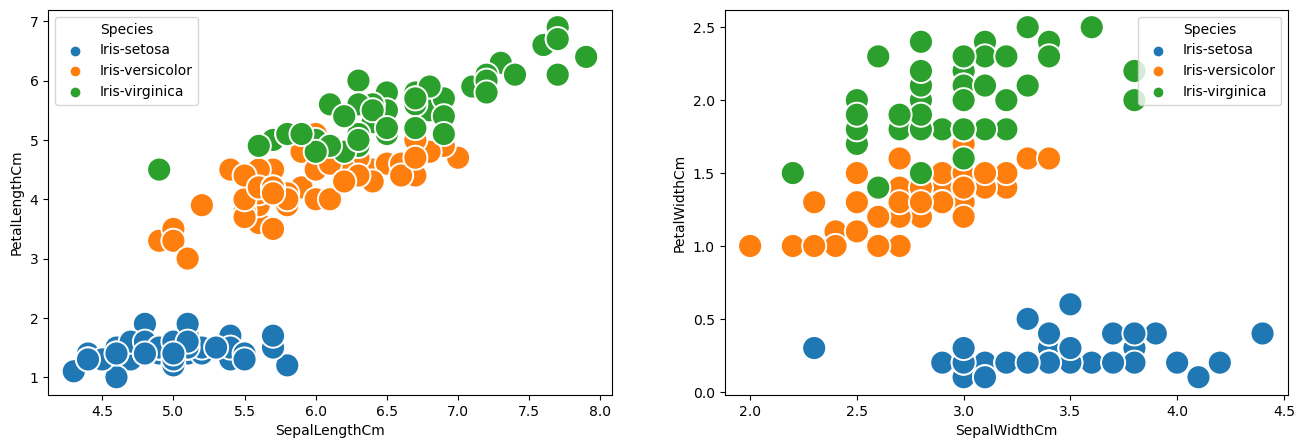

In [9]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=data,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=data,hue='Species',ax=ax2,s=300,marker='o')

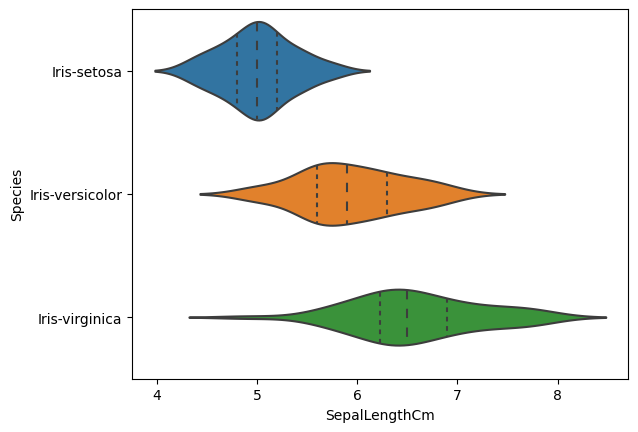

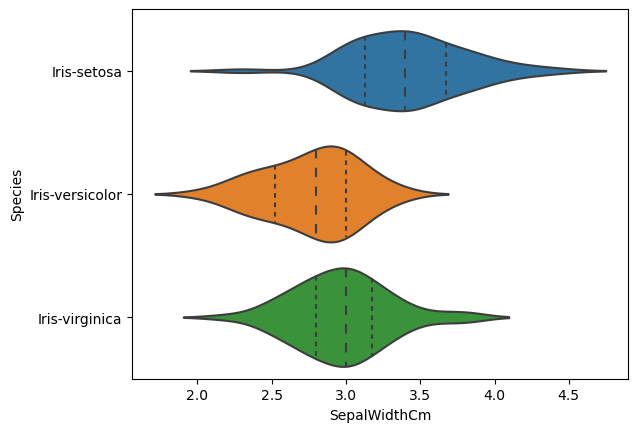

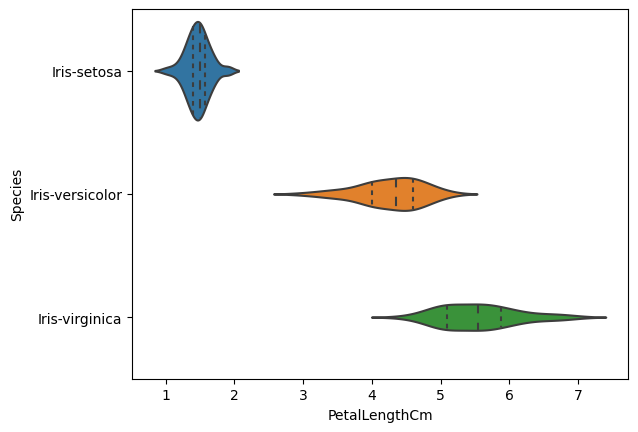

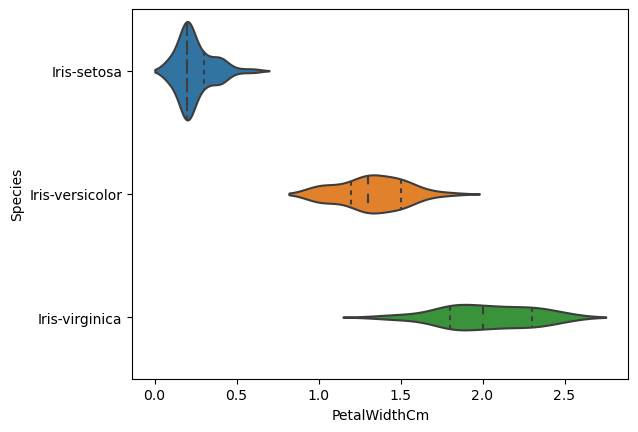

In [10]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

# Pie plot to show the overall types of Iris classifications

<Axes: ylabel='count'>

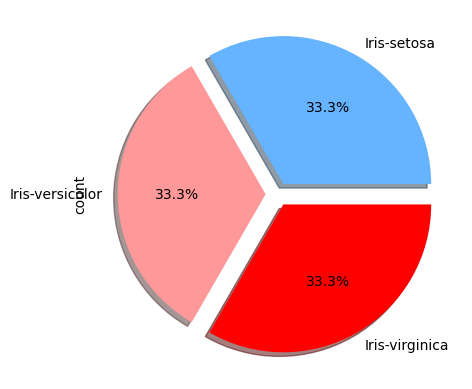

In [11]:
colors = ['#66b3ff','#ff9999','red']
data['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

# Heat Plot for Data

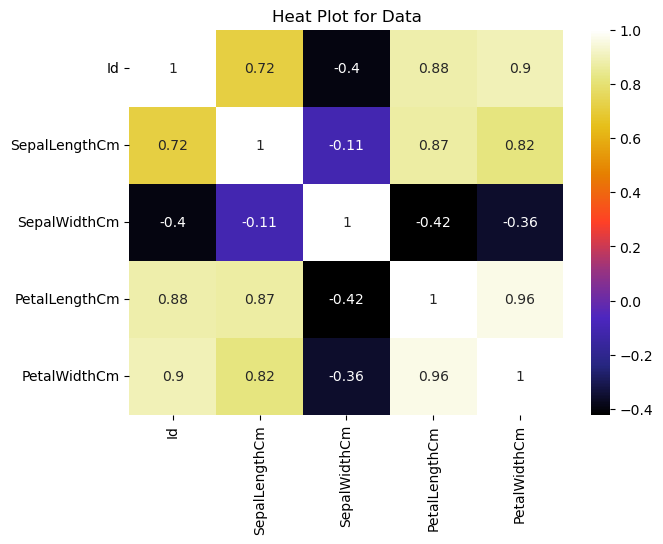

In [17]:
# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Create the heatmap using the numeric data
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()


# Defining independent and dependent variables

In [18]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data.loc[:, features].values   #defining the feature matrix
y = data.Species

# Splitting the dataset into training and test sets

In [19]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

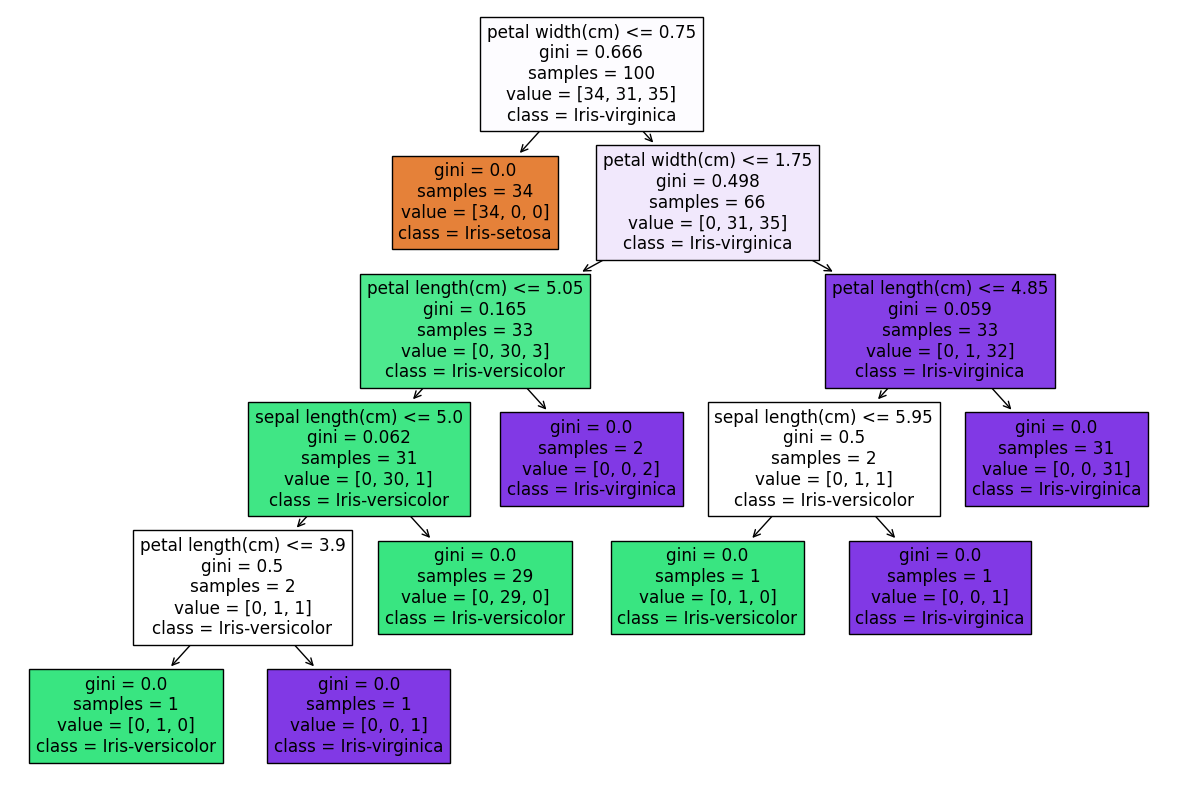

In [22]:
# Convert class_name to a list
class_name = data.Species.unique().tolist()

plt.figure(figsize=(15, 10))
tree.plot_tree(dtree, filled=True, feature_names=feature_name, class_names=class_name)
plt.show()


# Prediction on test data


In [23]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

# Checking the accuracy of the model

In [24]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


# Plotting confusion matrix

In [25]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



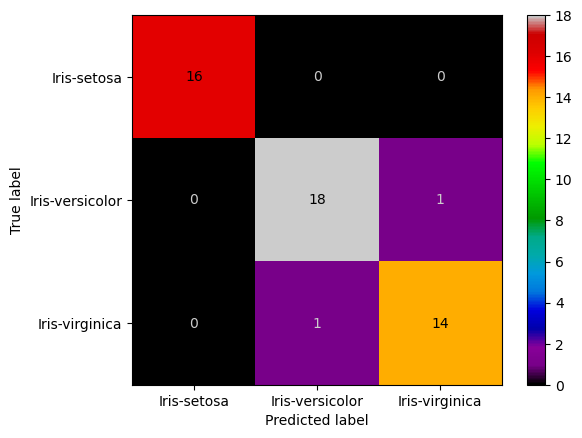

Accuracy: 96.0%


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to display classification report and confusion matrix
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))  # True labels first, then predictions

    # Plot confusion matrix using ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='nipy_spectral', colorbar=True)
    plt.show()

# Use the updated function
print('Decision Tree Classifier')
report(dtree)

# Calculate the model's accuracy
score = dtree.score(X_test, y_test)
print(f'Accuracy: {round(score * 100, 2)}%')


In [31]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]])

In [32]:
#Predicting the output class for random values for petal and sepal length and width
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['Iris-setosa'], dtype=object)

In [33]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

dtree.predict([[9, 3.1, 5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [34]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.1cm, 3cm, 5.1cm and 1.8cm respectively

dtree.predict([[4.1, 3.0, 5.1, 1.8]])

array(['Iris-virginica'], dtype=object)

# Thank You